# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [2]:
df = pd.read_csv('bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

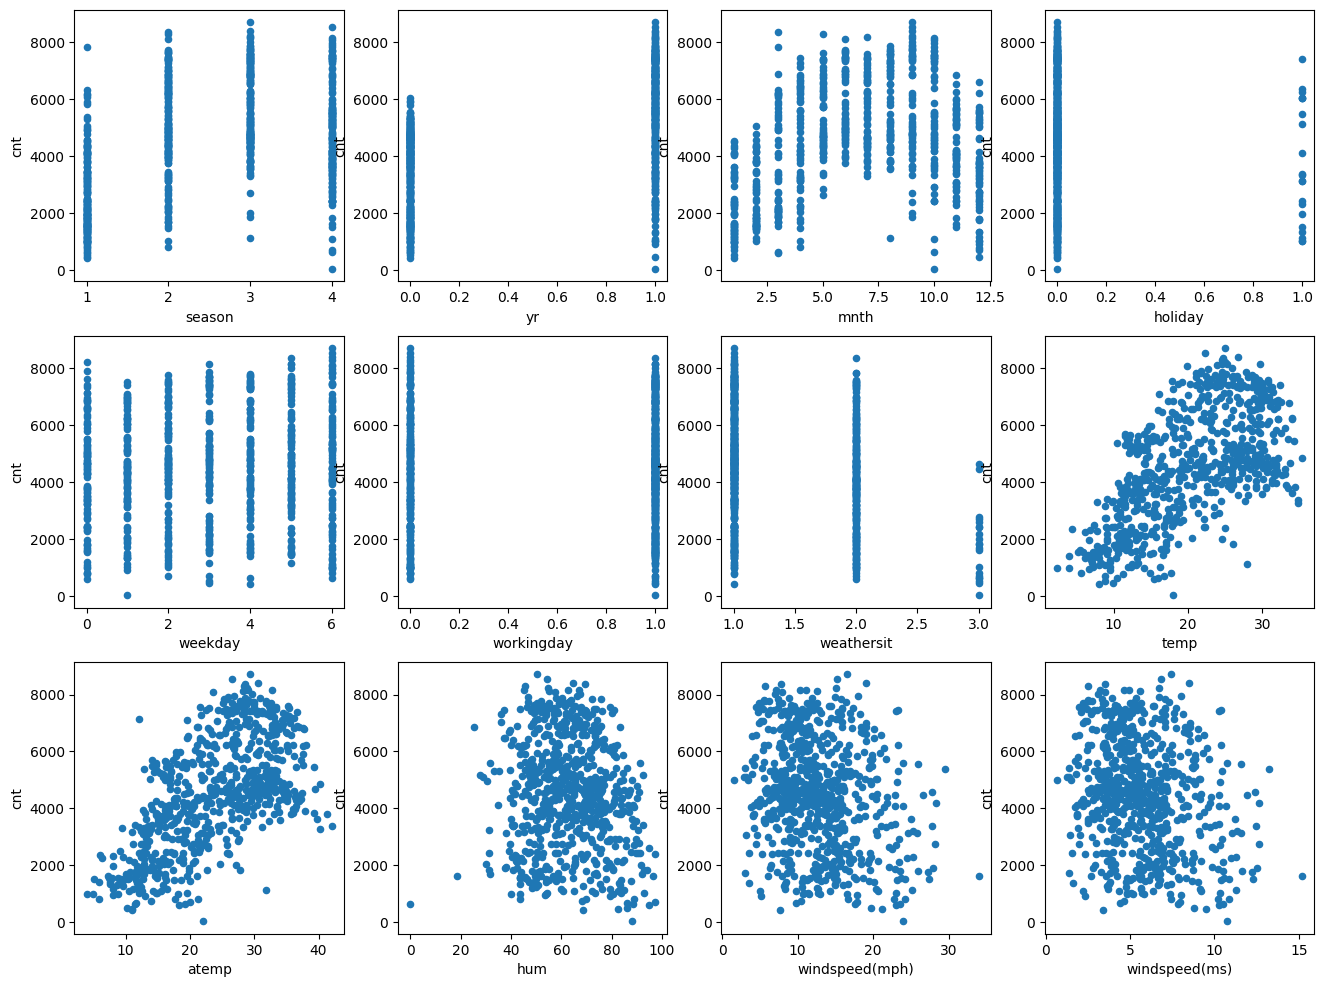

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

*Ответ*: судя по графику, что-то похожее на симметричное распределение. Возможно - нормальное

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

*Ответ*: temp (температура воздуха) и atemp (температура воздуха по ощущению)

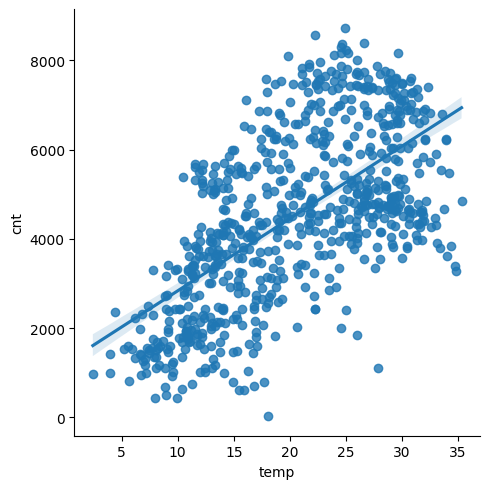

In [14]:
sns.lmplot(data=df, x="temp", y="cnt")

## 2. Корреляционная матрица 

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

##### *Ответ:* 
- Количество прокатов (*cnt*) коррелирует **меньше всего** с влажностью воздуха (*hum*), праздничным день или нет (*holiday*), днем недели(*weekday*), рабочий или не рабочий день (*workingday*).

- Количество прокатов (*cnt*) коррелирует **больше всего** с температурой воздуха (*temp*), ощущаемой температурой воздуха (*atemp*) и годом (*yr*) 

In [29]:
df_corr = df.corr()
np.abs(df_corr.cnt).sort_values(ascending = False)

cnt               1.000000
atemp             0.631066
temp              0.627494
yr                0.566710
season            0.406100
weathersit        0.297391
mnth              0.279977
windspeed(ms)     0.234545
windspeed(mph)    0.234545
hum               0.100659
holiday           0.068348
weekday           0.067443
workingday        0.061156
Name: cnt, dtype: float64

<Axes: >

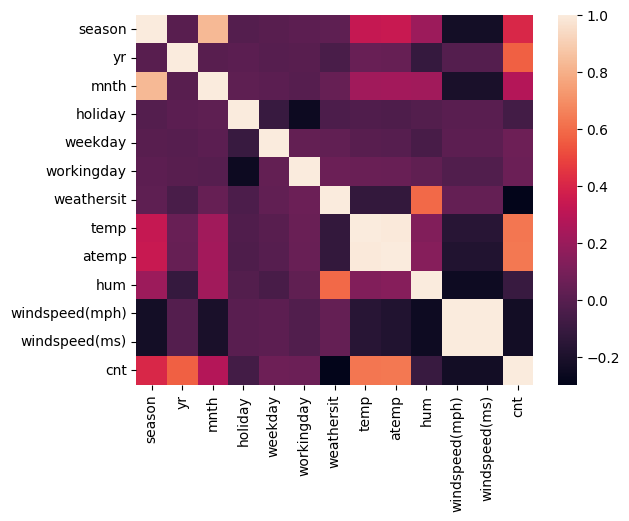

In [30]:
sns.heatmap(df_corr)

## 3. Barpot 

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

 ##### *Ответ:* судя по графику, число прокатов в 2012 году по сравнению с 2011 годом возросло в каждом месяце практически в два раза. Отсюда и имеем линейную зависимость суммарного числа прокатов от года.    

<Axes: xlabel='mnth', ylabel='cnt'>

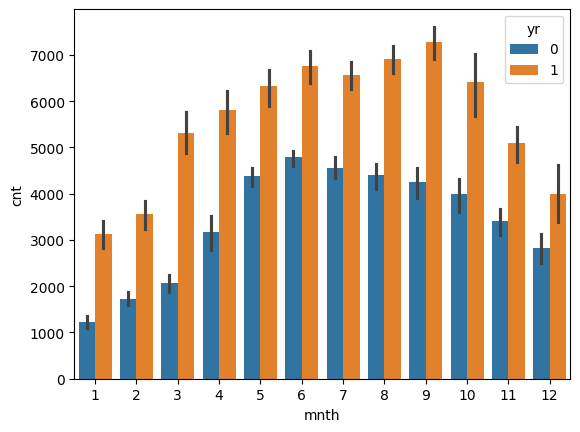

In [34]:
sns.barplot(df, x = 'mnth', y = 'cnt', hue = 'yr')

## 4. Countplot 

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

##### *Ответ:* данный датасет формировался следующим образом - бралось примерно одинаковое количество измерений в каждый день недели на протяжении двух лет. Оценка погоды была преимущественно хорошей. 
    
##### *Ответ:* такое распределение называется **равномерным**. 

<Axes: xlabel='weekday', ylabel='count'>

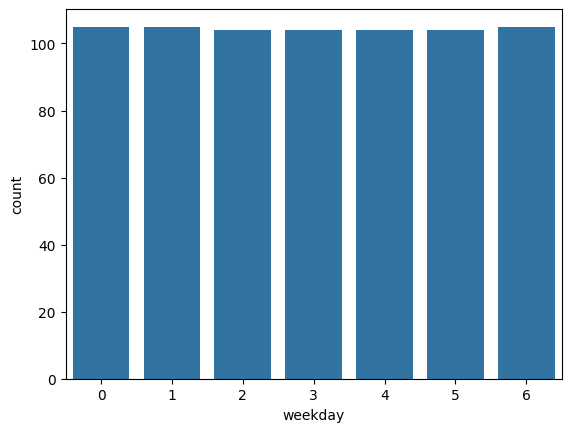

In [35]:
sns.countplot(df, x = "weekday")

<Axes: xlabel='weathersit', ylabel='count'>

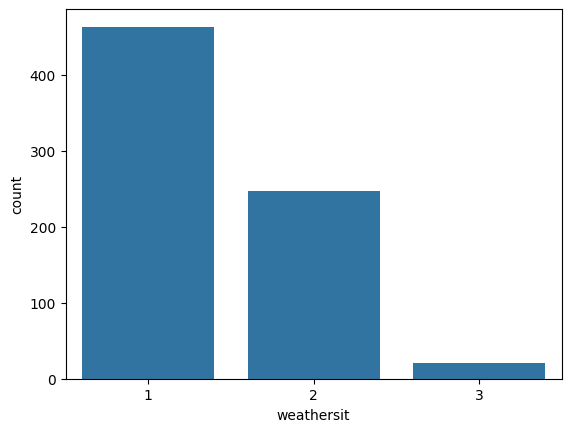

In [36]:
sns.countplot(df, x = "weathersit")

## 5. Распределение 

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

##### *Ответ:* судя по графику, примерно 4500 прокатов в день.   

##### *Ответ:* такое распределение называется **mixed normal distribution** (по крайней мере довольно сильно на него похоже). Состоит из "смеси" нескольких нормальных распределений.  

<Axes: xlabel='cnt', ylabel='Count'>

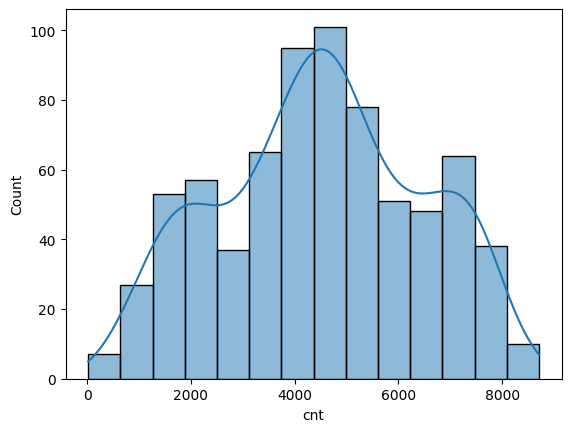

In [39]:
sns.histplot(df, x = 'cnt', kde = True)

In [41]:
# Проведем тест Шапиро-Уилка, чтобы проверить гипотезу о том, нормальное распределение перед нами или нет
from scipy.stats import shapiro

shapiro(df.cnt)
# т.к. p_value < 0.05, то мы можем отвергнуть гипотезу о том, что данное распределение является нормальным.

ShapiroResult(statistic=0.9801232218742371, pvalue=2.0795537736262304e-08)

## 6. Совместное распределение признаков 

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

##### *Ответ:* настораживают следующие моменты: 
- 1. Есть несколько значений, которые могут быть выбросами или аномалиями
- 2. Судя по графику, ощущаемая температура практически всегда выше, чем температура на самом деле. 

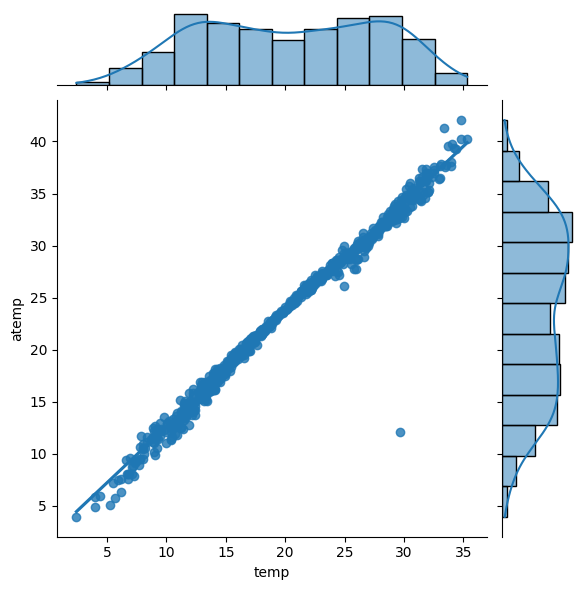

In [54]:
sns.jointplot(x ='temp', y = 'atemp', data = df, kind = "reg")

## 7. Ящик с усами 

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


##### *Ответ:* возможно это может быть связано с расписанием отпусков и предпочтительных дней для отдыха на природе/выезда за город на велосипеде. Также, в будний день люди обычно заняты работой или учебой, поэтому велосипед в прокат может быть популярным средством передвижения для коммутирования между домом и работой/учебой. 

<Axes: xlabel='mnth', ylabel='cnt'>

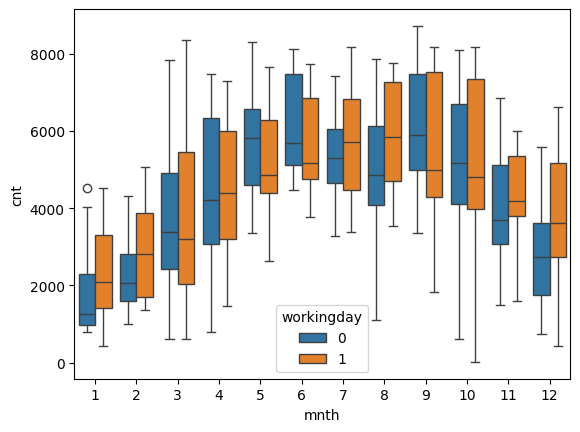

In [55]:
sns.boxplot(df, x = 'mnth', y = 'cnt', hue = 'workingday')

## 8. Хитрый вопрос 

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Сделаем новый признак *temp_diff*, который будет рассчитан следующим образом: 

`temp_diff = temp - atemp`

Чем больше данный признак, тем меньшую температуру воздуха чувствует человек, относительно действительной температуры воздуха.  

In [76]:
df['temp_diff'] = df['temp'] - df['atemp']
df.query("temp_diff <= 0").temp_diff.count() 

729

Размер исходного датасета - 731. 
Два значения имеют положительную разницу, т.е. действительная температура превышала ощущаемую только дважды
Это мы могли наблюдать в п.6 и будем иметь это в виду, как аномалии 

In [72]:
# аномальные значения 
for value in df.temp_diff:
    if value > 0:
        print(value)

0.14459999999999962
17.536653


In [89]:
# В дальнейшем будем использовать абсолютное значение для наглядности и простоты
df['temp_diff'] = np.abs(df['temp_diff'])

tmp = df.query("temp_diff <= 6")

<Axes: xlabel='temp_diff', ylabel='windspeed(ms)'>

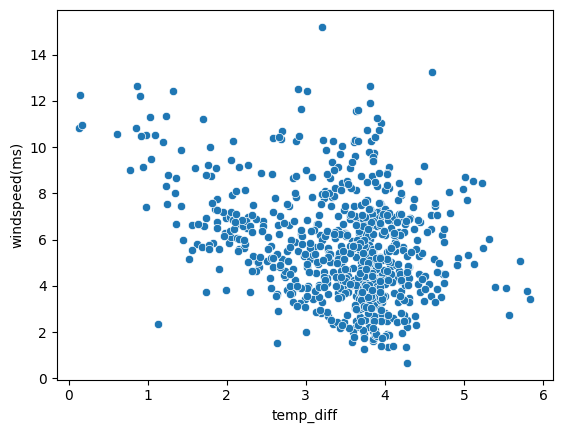

In [93]:
sns.scatterplot(tmp, x = 'temp_diff', y = 'windspeed(ms)')

##### *Ответ:* из графика видим, что данная гипотеза может работать в обратную сторону, т.е. чем сильнее ветер, тем менее холодной ощущается температура воздуха. 